# ЛАБОРАТОРНАЯ РАБОТА №9. ПОНИЖЕНИЕ РАЗМЕРНОСТИ. ОТБОР ПРИЗНАКОВ. ИЗВЛЕЧЕНИЕ ПРИЗНАКОВ

## Задание №1.

### 1. Для выполнения задания №1 используйте датасеты для задачи классификации и регрессии.

In [4]:
from pprint import pprint
import warnings

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.manifold import TSNE, Isomap
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler    
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf


warnings.filterwarnings('ignore')

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def metrics_c(actual, pred):
  return {
    'Accuracy': accuracy_score(actual, pred),
    'Precision': precision_score(actual, pred),
    'Recall': recall_score(actual, pred),
    'F1-score': f1_score(actual, pred),
    'ROC_AUC': roc_auc_score(actual, pred)
  }
models_c = {}

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt

def metrics_r(actual, pred):
  return {
    'MAE': mean_absolute_error(actual, pred),
    'MSE': mean_squared_error(actual, pred),
    'RMSE': sqrt(mean_squared_error(actual, pred)),
    'MAPE': mean_absolute_percentage_error(actual, pred),
    'R^2': r2_score(actual, pred)
  }
models_r = {}

In [40]:
def best_model(models, metrics):
    return max([(val[metrics], k) for k, val in models.items()])

In [41]:
dfc = pd.read_csv('../data/neo_task_upd.csv')[:5561]
yc = dfc['hazardous']
Xc = dfc.drop(['hazardous'], axis=1)

smote = SMOTE()
Xc, yc = smote.fit_resample(Xc, yc)

In [42]:
dfr = pd.read_csv('../data/energy_task_upd.csv', parse_dates=['date']).set_index('date')
yr = dfr['Appliances']
Xr = dfr.drop(['Appliances'], axis=1)

In [43]:
classifications = {}
regressions ={}

In [44]:
def classification(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    bag = BaggingClassifier().fit(X_train, y_train)
    predict = bag.predict(X_test)
    print(classification_report(y_test, predict))
    print(confusion_matrix(y_test, predict))
    return metrics_c(y_test, predict)
    
classification(Xc, yc)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       986
           1       0.90      0.94      0.92      1010

    accuracy                           0.91      1996
   macro avg       0.91      0.91      0.91      1996
weighted avg       0.91      0.91      0.91      1996

[[875 111]
 [ 62 948]]


{'Accuracy': 0.9133266533066132,
 'Precision': 0.8951841359773371,
 'Recall': 0.9386138613861386,
 'F1-score': 0.916384726921218,
 'ROC_AUC': 0.9130188982387083}

In [45]:
def regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    bag = BaggingRegressor().fit(X_train, y_train)
    return metrics_r(y_test, bag.predict(X_test))

regression(Xr, yr)

{'MAE': 10.3582995951417,
 'MSE': 233.09109311740892,
 'RMSE': 15.267321085161237,
 'MAPE': 0.18741079573822492,
 'R^2': 0.6313758075990814}

### 2. С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов.

#### VarianceThreshold

In [46]:
np.var(Xc)

est_diameter_min      1.143115e-02
est_diameter_max      5.715574e-02
relative_velocity     5.771491e+08
miss_distance         4.795650e+14
absolute_magnitude    7.426503e+00
dtype: float64

In [47]:
vt = VarianceThreshold(7.44188536e+00)
Xc_vt = vt.fit_transform(Xc)

print(Xc.shape)
print(Xc_vt.shape)

Xc_vt = pd.DataFrame(Xc_vt, columns=vt.get_feature_names_out())
metric = classification(Xc_vt, yc)
classifications['VarianceThreshold'] = metric, Xc_vt.shape
metric

(9980, 5)
(9980, 2)
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1018
           1       0.72      0.71      0.72       978

    accuracy                           0.72      1996
   macro avg       0.72      0.72      0.72      1996
weighted avg       0.72      0.72      0.72      1996

[[748 270]
 [281 697]]


{'Accuracy': 0.7239478957915831,
 'Precision': 0.7207859358841778,
 'Recall': 0.712678936605317,
 'F1-score': 0.7167095115681235,
 'ROC_AUC': 0.7237265017014797}

In [48]:
np.sort(np.var(Xr))

array([  1.72194954,   2.15147384,   3.02264353,   3.29658204,
         3.41042041,   3.60187634,   3.6085423 ,   3.69043392,
         3.86597207,   3.87947015,   5.5512069 ,   9.31154878,
        12.73054412,  14.45126985,  15.57039936,  16.1090484 ,
        16.7108632 ,  20.74798209,  22.25451195,  24.9478657 ,
        27.07761348,  31.17542443,  46.6623831 ,  48.57542719,
        66.25587957,  75.37582544, 186.47728331, 846.21648051])

In [49]:
vt = VarianceThreshold(48.57542719)
Xr_vt = vt.fit_transform(Xr)

print(Xr.shape)
print(Xr_vt.shape)

Xr_vt = pd.DataFrame(Xr_vt, columns=vt.get_feature_names_out())

metric = regression(Xr_vt, yr)
regressions['VarianceThreshold'] = metric, Xr_vt.shape
metric

(9880, 28)
(9880, 5)


{'MAE': 11.573317508514876,
 'MSE': 284.0003008376277,
 'RMSE': 16.85230847206482,
 'MAPE': 0.2038154923562387,
 'R^2': 0.5640529365555806}

#### SelectKBest

In [50]:
skb = SelectKBest(k=2)
Xc_skb = skb.fit_transform(Xc, yc)

print(Xc.shape)
print(Xc_skb.shape)

Xc_skb = pd.DataFrame(Xc_skb, columns=skb.get_feature_names_out())
metric = classification(Xc_skb, yc)
classifications['SelectKBest'] = metric, Xc_skb.shape
metric

(9980, 5)
(9980, 2)
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1018
           1       0.94      0.88      0.91       978

    accuracy                           0.92      1996
   macro avg       0.92      0.92      0.92      1996
weighted avg       0.92      0.92      0.92      1996

[[966  52]
 [113 865]]


{'Accuracy': 0.9173346693386774,
 'Precision': 0.9432933478735005,
 'Recall': 0.8844580777096115,
 'F1-score': 0.9129287598944591,
 'ROC_AUC': 0.9166887638056899}

In [51]:
skb = SelectKBest(k=4)
Xr_skb = skb.fit_transform(Xr, yr)

print(Xr.shape)
print(Xr_skb.shape)

Xr_skb = pd.DataFrame(Xr_skb, columns=skb.get_feature_names_out())
metric = regression(Xr_skb, yr)
regressions['SelectKBest'] = metric, Xr_skb.shape
metric

(9880, 28)
(9880, 4)


{'MAE': 11.40974973491421,
 'MSE': 296.9175405869584,
 'RMSE': 17.23129538331226,
 'MAPE': 0.19641717059294533,
 'R^2': 0.5447575072142753}

#### RFE

In [52]:
treec = DecisionTreeClassifier().fit(Xc, yc)
rfe = RFE(estimator=treec, n_features_to_select=5, step=1).fit(Xc, yc)
Xc_rfe = pd.DataFrame(rfe.transform(Xc), columns=rfe.get_feature_names_out())

print(Xc.shape)
print(Xc_rfe.shape)

classification(Xc_rfe, yc)

(9980, 5)
(9980, 5)
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       989
           1       0.90      0.94      0.92      1007

    accuracy                           0.92      1996
   macro avg       0.92      0.92      0.92      1996
weighted avg       0.92      0.92      0.92      1996

[[889 100]
 [ 62 945]]


{'Accuracy': 0.9188376753507014,
 'Precision': 0.9043062200956937,
 'Recall': 0.9384309831181727,
 'F1-score': 0.9210526315789473,
 'ROC_AUC': 0.9186593742688943}

In [53]:
treer = DecisionTreeClassifier().fit(Xr, yr)
rfe = RFE(estimator=treer, n_features_to_select=28, step=1).fit(Xr, yr)
Xr_rfe = pd.DataFrame(rfe.transform(Xr), columns=rfe.get_feature_names_out())

print(Xr.shape)
print(Xr_rfe.shape)

regression(Xr_rfe, yr)

(9880, 28)
(9880, 28)


{'MAE': 10.508603238866396,
 'MSE': 245.22823886639677,
 'RMSE': 15.659764968427744,
 'MAPE': 0.18751252686330233,
 'R^2': 0.6193157328922886}

#### PCA

In [54]:
pca = PCA(n_components=3)
Xc_pca = pca.fit_transform(Xc, yc)

print(Xc.shape)
print(Xc_pca.shape)

metric = classification(Xc_pca, yc)
classifications['PCA'] = metric, Xc_pca.shape
metric

(9980, 5)
(9980, 3)
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      1027
           1       0.85      0.93      0.89       969

    accuracy                           0.89      1996
   macro avg       0.89      0.89      0.89      1996
weighted avg       0.89      0.89      0.89      1996

[[870 157]
 [ 66 903]]


{'Accuracy': 0.8882765531062125,
 'Precision': 0.8518867924528302,
 'Recall': 0.9318885448916409,
 'F1-score': 0.8900936421882701,
 'ROC_AUC': 0.8895080504399783}

In [55]:
pca = PCA(n_components=5)
Xr_pca = pca.fit_transform(Xr, yr)

print(Xr.shape)
print(Xr_pca.shape)

metric = regression(Xr_pca, yr)
regressions['PCA'] = metric, Xr_pca.shape
metric

(9880, 28)
(9880, 5)


{'MAE': 12.640182186234817,
 'MSE': 340.1088056680162,
 'RMSE': 18.442039086500607,
 'MAPE': 0.223870572957744,
 'R^2': 0.4467580487355759}

#### tSNE

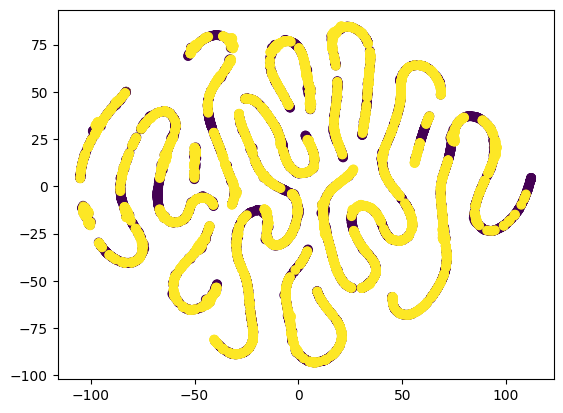

In [56]:
tsne = TSNE(n_components=2)
Xc_tsne = tsne.fit_transform(Xc)
plt.scatter(Xc_tsne[:,0], Xc_tsne[:,1], c=yc)

In [57]:
metric = classification(Xc_tsne, yc)
classifications['TSNE'] = metric, Xc_tsne.shape
metric

              precision    recall  f1-score   support

           0       0.68      0.67      0.67      1004
           1       0.67      0.68      0.67       992

    accuracy                           0.67      1996
   macro avg       0.67      0.67      0.67      1996
weighted avg       0.67      0.67      0.67      1996

[[671 333]
 [320 672]]


{'Accuracy': 0.6728456913827655,
 'Precision': 0.6686567164179105,
 'Recall': 0.6774193548387096,
 'F1-score': 0.6730095142714071,
 'ROC_AUC': 0.6728730240329007}

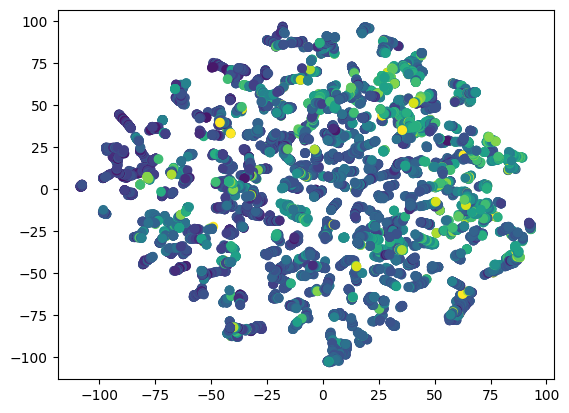

In [58]:
tsne = TSNE(n_components=2)
Xr_tsne = tsne.fit_transform(Xr)
plt.scatter(Xr_tsne[:,0], Xr_tsne[:,1], c=yr)

In [59]:
metric = regression(Xr_tsne, yr)
regressions['TSNE'] = metric, Xr_tsne.shape
metric

{'MAE': 11.491396761133604,
 'MSE': 277.7606275303644,
 'RMSE': 16.666152151302484,
 'MAPE': 0.2039856711254663,
 'R^2': 0.5695602069405215}

#### Isomap

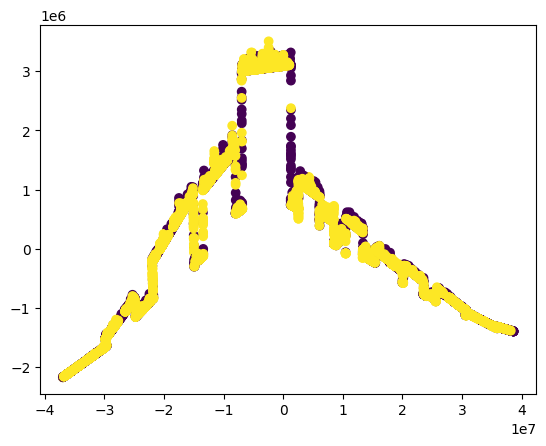

In [60]:
isomap = Isomap(n_components=2)
Xc_isomap = isomap.fit_transform(Xc)
plt.scatter(Xc_isomap[:,0], Xc_isomap[:,1], c=yc)

In [61]:
metric = classification(Xc_isomap, yc)
classifications['Isomap'] = metric, Xc_isomap.shape
metric

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1024
           1       0.70      0.67      0.69       972

    accuracy                           0.70      1996
   macro avg       0.70      0.70      0.70      1996
weighted avg       0.70      0.70      0.70      1996

[[743 281]
 [316 656]]


{'Accuracy': 0.7009018036072144,
 'Precision': 0.7001067235859125,
 'Recall': 0.6748971193415638,
 'F1-score': 0.6872708224201153,
 'ROC_AUC': 0.7002415284207819}

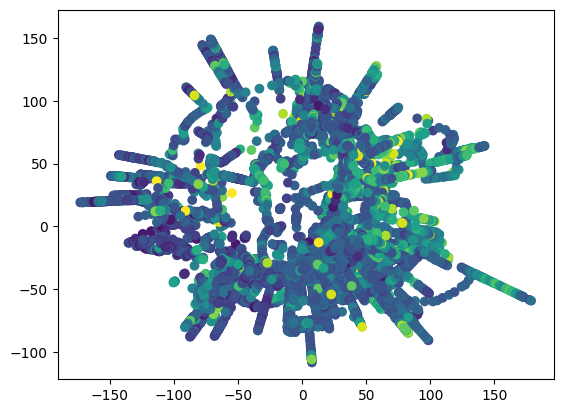

In [62]:
isomap = Isomap(n_components=2)
Xr_isomap = isomap.fit_transform(Xr)
plt.scatter(Xr_isomap[:,0], Xr_isomap[:,1], c=yr)

In [63]:
metric = regression(Xr_isomap, yr)
regressions['Isomap'] = metric, Xr_isomap.shape
metric

{'MAE': 15.259109311740891,
 'MSE': 483.1113360323887,
 'RMSE': 21.979793812326555,
 'MAPE': 0.27578312622471207,
 'R^2': 0.2027382042362531}

### 3. Выберите две модели (одна - для регрессии и другая - для классификации). Обучите выбранные модели с использованием данных в пространстве низкой размерности - используйте результаты выполнения пункта 3 (не забудьте, что понижать нужно и X_train и X_test, но проще всего понижать X).

In [64]:
pprint(classifications)

{'Isomap': ({'Accuracy': 0.7009018036072144,
             'F1-score': 0.6872708224201153,
             'Precision': 0.7001067235859125,
             'ROC_AUC': 0.7002415284207819,
             'Recall': 0.6748971193415638},
            (9980, 2)),
 'PCA': ({'Accuracy': 0.8882765531062125,
          'F1-score': 0.8900936421882701,
          'Precision': 0.8518867924528302,
          'ROC_AUC': 0.8895080504399783,
          'Recall': 0.9318885448916409},
         (9980, 3)),
 'SelectKBest': ({'Accuracy': 0.9173346693386774,
                  'F1-score': 0.9129287598944591,
                  'Precision': 0.9432933478735005,
                  'ROC_AUC': 0.9166887638056899,
                  'Recall': 0.8844580777096115},
                 (9980, 2)),
 'TSNE': ({'Accuracy': 0.6728456913827655,
           'F1-score': 0.6730095142714071,
           'Precision': 0.6686567164179105,
           'ROC_AUC': 0.6728730240329007,
           'Recall': 0.6774193548387096},
          (9980, 2)),
 'Varian

In [65]:
pprint(regressions)

{'Isomap': ({'MAE': 15.259109311740891,
             'MAPE': 0.27578312622471207,
             'MSE': 483.1113360323887,
             'RMSE': 21.979793812326555,
             'R^2': 0.2027382042362531},
            (9880, 2)),
 'PCA': ({'MAE': 12.640182186234817,
          'MAPE': 0.223870572957744,
          'MSE': 340.1088056680162,
          'RMSE': 18.442039086500607,
          'R^2': 0.4467580487355759},
         (9880, 5)),
 'SelectKBest': ({'MAE': 11.40974973491421,
                  'MAPE': 0.19641717059294533,
                  'MSE': 296.9175405869584,
                  'RMSE': 17.23129538331226,
                  'R^2': 0.5447575072142753},
                 (9880, 4)),
 'TSNE': ({'MAE': 11.491396761133604,
           'MAPE': 0.2039856711254663,
           'MSE': 277.7606275303644,
           'RMSE': 16.666152151302484,
           'R^2': 0.5695602069405215},
          (9880, 2)),
 'VarianceThreshold': ({'MAE': 11.573317508514876,
                        'MAPE': 0.203815492356

### 4. Сформулируйте вывод о том, какие методы понижения размерности лучше всего подходят для Ваших данных.

## ЗАДАНИЕ №2**.

### 1. Самостоятельно реализуйте алгоритм PCA. На основе датасета для задачи классификации выполните понижение размерности до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).

In [44]:
def Pca(X, n_components):
    # Вычисляем среднее значение для каждого столбца
    mean = np.mean(X, axis=0)
    
    # Центрируем данные путем вычитания среднего значения
    center_X = X - mean
    
    # Вычисляем ковариационную матрицу
    cov_matrix = np.cov(center_X.T)
    
    # Вычисляем собственные значения и собственные векторы
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    # Сортируем собственные значения в убывающем порядке
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]
    
    # Выбираем первые num_components собственных векторов
    components = sorted_eigenvectors[:, :n_components]
    
    # Проецируем данные на пространство главных компонент
    transform_X = np.dot(center_X, components)
    
    return transform_X

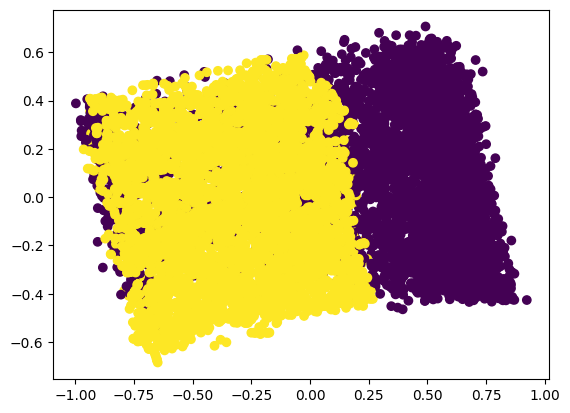

In [45]:
scaler = MinMaxScaler()
Xc = scaler.fit_transform(Xc)

pca = Pca(Xc,2)
plt.scatter(pca[:,0], pca[:,1], c=yc)

### 2. Выполнить кластеризацию преобразованных в пункте 1 данных с помощью Вашей реализации алгоритма KMeans из ЛР6.

In [46]:
def Kmeans(X, k, max_iters=100):
    # Инициализация центроидов случайным образом
    centroids = X[np.random.choice(range(X.shape[0]), size=k, replace=False)]
    
    for _ in range(max_iters):
        # Нахождение ближайшего центроида для каждой точки
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=-1), axis=1)
        
        # Обновление центроидов
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Проверка на сходимость
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

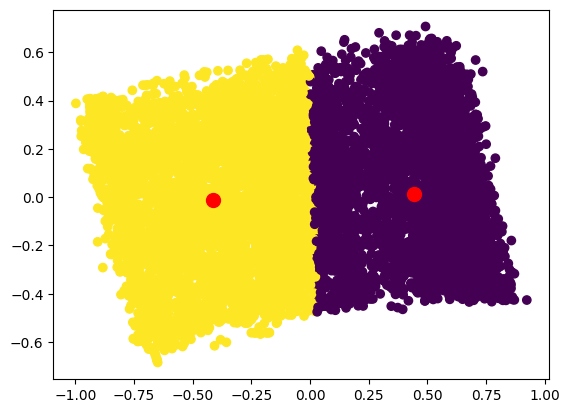

In [47]:
labels, centroids = Kmeans(pca, 2)
plt.scatter(pca[:,0], pca[:,1], c=labels)
plt.scatter(centroids[:,0], centroids[:,1], s=100, c='red')